<a href="https://colab.research.google.com/github/malevashov/data-visualization-course-tsu/blob/main/Project3_Dimonds_Michael_Levashov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT 3 - PCA Analysis of Diamonds DataSet

In this project, you will use the diamonds dataset and answer the questions.
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price--> price in US dollars (range is between \\$326 and \\$18,823)

carat--> weight of the diamond (range is between 0.2 and 5.01)

cut--> quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color--> diamond colour, from J (worst) to D (best)

clarity--> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x--> length in mm (range is between 0 and 10.74)

y--> width in mm (range is between 0 and 58.9)

z--> depth in mm (range is between 0 and 31.8)

depth--> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (range is between 43 and 79)

table--> width of top of diamond relative to widest point (range is between 43-95)

You can see and use pandas dataframe applications on this set from this website: https://www.w3resource.com/python-exercises/pandas/practice-set1/index.php

In [ ]:
#include all the modules here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [ ]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data

df = pd.read_csv('diamonds.csv')
print(df.shape)
df.head(5)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Take only the columns with numeric data and put into a dataframe

df_numeric_values = df.drop(columns = ['cut', 'clarity', 'color'])
print(df_numeric_values.shape)
df_numeric_values.head()

(53940, 7)


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Find and show the zero values in x, y, z and remove them from your df (low outliers are x<3.5 or y<3.5 or z<2)
# Remove these entries from the dataframe
# show entries I am removing

zero_values = df_numeric_values[(df_numeric_values['x'] == 0) | (df_numeric_values['y'] == 0) | (df_numeric_values['z'] == 0)]

print(zero_values.shape)
print(zero_values)


(20, 7)
       carat  depth  table  price     x     y    z
2207    1.00   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71   64.1   6

### Removing zero values from columns x, y and z

In [ ]:
no_zero_values = df_numeric_values.drop(zero_values.index, axis=0)

print(no_zero_values.shape)
print(no_zero_values)

(53920, 7)
       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 7 columns]


### Finding and removing low outliers

In [ ]:
low_outliers = no_zero_values[(no_zero_values['x'] < 3.5) | (no_zero_values['y'] < 3.5) | (no_zero_values['z'] < 2.0)]

print(low_outliers.shape)
print(low_outliers)


(3, 7)
       carat  depth  table  price     x     y     z
14635   1.07   60.6   57.0   5909  6.62  6.67  1.07
20694   1.53   61.9   54.0   8971  7.43  7.50  1.53
21654   1.41   60.7   56.0   9752  7.31  7.22  1.41


In [ ]:
no_low_outliers = no_zero_values.drop(low_outliers.index, axis = 0)

print(no_low_outliers.shape)
print(no_low_outliers)

(53917, 7)
       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53917 rows x 7 columns]


In [ ]:
# Find and show high outliers, and remove them from your df ( high outliers are the ones y>10 or z>6)
# Remove these entries from the dataframe

high_outliers = no_low_outliers[(no_low_outliers['y'] > 10) | (no_low_outliers['z'] > 6)]

print(high_outliers.shape)
print(high_outliers)

(15, 7)
       carat  depth  table  price      x      y      z
23644   3.65   67.1   53.0  11668   9.53   9.48   6.38
24067   2.00   58.9   57.0  12210   8.09  58.90   8.06
24328   3.50   62.8   57.0  12587   9.65   9.59   6.03
25998   4.01   61.0   61.0  15223  10.14  10.10   6.17
25999   4.01   62.5   62.0  15223  10.02   9.94   6.24
26194   2.01   65.6   56.0  15562   7.89   7.84   6.16
26431   3.40   66.8   52.0  15964   9.42   9.34   6.27
26444   4.00   63.3   58.0  15984  10.01   9.94   6.31
26534   3.67   62.4   56.0  16193   9.86   9.81   6.13
27130   4.13   64.8   61.0  17329  10.00   9.85   6.43
27415   5.01   65.5   59.0  18018  10.74  10.54   6.98
27630   4.50   65.8   58.0  18531  10.23  10.16   6.72
27679   3.51   62.5   59.0  18701   9.66   9.63   6.03
48410   0.51   61.8   54.7   1970   5.12   5.15  31.80
49189   0.51   61.8   55.0   2075   5.15  31.80   5.12


In [ ]:
no_outliers = no_low_outliers.drop(high_outliers.index, axis = 0)

print(no_outliers.shape)
print(no_outliers)

(53902, 7)
       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53902 rows x 7 columns]


In [ ]:
# Find and show the points of which depth values do not match x, y, and z values, and remove them from your df
# (incorrect depth the ones which satify; abs(2 * z / (x + y)) - depth  < 0.1  )
# Remove these entries from the dataframe

incorrect_depth = no_outliers[abs(no_outliers['depth'] - abs(2 * no_outliers['z'] / ( no_outliers['x'] + no_outliers['y'] ) ) * 100) > 0.1]

print(incorrect_depth.shape)
print(incorrect_depth)


(1758, 7)
       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
96      0.70   59.4   62.0   2759  5.71  5.76  3.40
97      0.96   66.3   62.0   2759  6.27  5.95  4.07
151     0.74   61.3   56.0   2769  5.82  5.86  3.57
177     0.72   63.7   56.4   2776  5.62  5.69  3.61
...      ...    ...    ...    ...   ...   ...   ...
53727   0.78   66.9   57.0   2721  5.70  5.66  3.60
53757   0.72   55.4   64.0   2724  6.06  5.97  3.34
53814   0.77   64.3   57.9   2734  5.70  5.86  3.71
53839   0.71   61.6   57.0   2738  5.72  5.76  3.53
53863   1.00   66.8   56.0   2743  6.22  6.12  4.13

[1758 rows x 7 columns]


In [ ]:
final_df = no_outliers.drop(incorrect_depth.index, axis = 0)

print(final_df.shape)
print(final_df)

(52144, 7)
       carat  depth  table  price     x     y     z
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
5       0.24   62.8   57.0    336  3.94  3.96  2.48
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[52144 rows x 7 columns]


## Question 1. How many samples were there in the original data and how many samples left after you clean the outliers?
$\color{red}{\text{Answer:}}$

The original data set consisted 53,940 rows and 10 columns. After dropping columns with alphanumeric values, we were left with 7 columns consisted only of numeric values. Further, we cleaned the data by getting rid of values equal to 0 in x, y, and z attributes. We deleted rows that consisted of lower or upper outliers. Finally, we got rid of the rows that consisted depth values that were too far off of a calculated depth values. Leaving us 7 columns and 52,144 rows of cleaned up data.

### Correlation and Heatmaps

In [ ]:
# Find and show the correlation matrix

final_df_corr = final_df.corr()
final_df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.024942,0.179699,0.923743,0.978845,0.978163,0.978058
depth,0.024942,1.000000,-0.307307,-0.011565,-0.027911,-0.030379,0.093437
table,0.179699,-0.307307,1.000000,0.127266,0.192920,0.187719,0.152653
price,0.923743,-0.011565,0.127266,1.000000,0.888144,0.889521,0.883748
x,0.978845,-0.027911,0.192920,0.888144,1.000000,0.998963,0.992120
y,0.978163,-0.030379,0.187719,0.889521,0.998963,1.000000,0.991820
z,0.978058,0.093437,0.152653,0.883748,0.992120,0.991820,1.000000


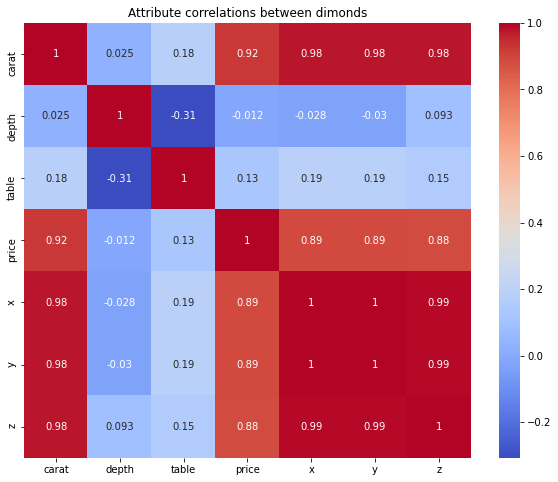

In [ ]:
# Use seaborn heatmap to see the correlations

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 10})

ax = sns.heatmap(final_df_corr, annot = True, cmap = 'coolwarm').set_title('Attribute correlations between dimonds')

## Question 2. Which feature has the highest correlation with the price, please explain your graph?
$\color{red}{\text{Answer:}}$

Length, width, depth, and carat were highly correlated with a price of a diamond. In other words, the size and carat of a diamond determine the price of the dimond. Moreover, carat is highly correlated with the size of a dimond, which makes sense because carat measures the weight of a dimond. In conclusion, the bigger the diamond the higher the price and

In [ ]:
### PCA Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
# Create a PCA object and calculate the principal components and show them.
# Also transform the data using the PCA

scaled_data = preprocessing.scale(final_df)

print(scaled_data)


[[-1.24700544 -1.38519259  1.59586549 ... -1.64847254 -1.70668917
  -1.78282627]
 [-1.20454621 -3.4469928   3.40197565 ... -1.50526759 -1.4994573
  -1.78282627]
 [-1.07716851  0.46331794  0.24128286 ... -1.37101296 -1.355296
  -1.31885253]
 ...
 [-0.20675425  0.74770417  1.14433795 ... -0.06426787 -0.04883421
   0.02957116]
 [ 0.13291961 -0.53203389  0.24128286 ...  0.37429727  0.34760936
   0.29055639]
 [-0.10060617  0.32112482 -1.11329976 ...  0.08788738  0.12235733
   0.1455646 ]]


In [ ]:
pca = PCA(n_components = 3)
principal_components = pca.fit(scaled_data)

print(principal_components)


PCA(n_components=3)


In [ ]:
pca_data = pca.transform(scaled_data)

In [ ]:
print(pca.components_)

[[ 0.45048568 -0.00209725  0.09780581  0.42356814  0.45090377  0.45082895
   0.44891129]
 [-0.03454976 -0.72944548  0.67668023 -0.03538847  0.00273288  0.00140702
  -0.08693493]
 [-0.00621292  0.67479844  0.72694411 -0.10284451 -0.0409455  -0.04918881
   0.03857014]]


## Question 3. How many principal components will be calculated if you don't specify the components number for this example? Why? Explain it.
$\color{red}{\text{Answer:}}$

However many it takes to describe 100% of the data. in this case it takes 3 principal components to describe about 97.39% of the data and 5 principal components to describe 99.981054% of the data.

In [ ]:
# Show the variance and the variance ratios in %
print(pca.explained_variance_)
print(pca.explained_variance_ratio_ )

[4.84084007 1.29702208 0.67973994]
[0.69153532 0.18528531 0.09710384]


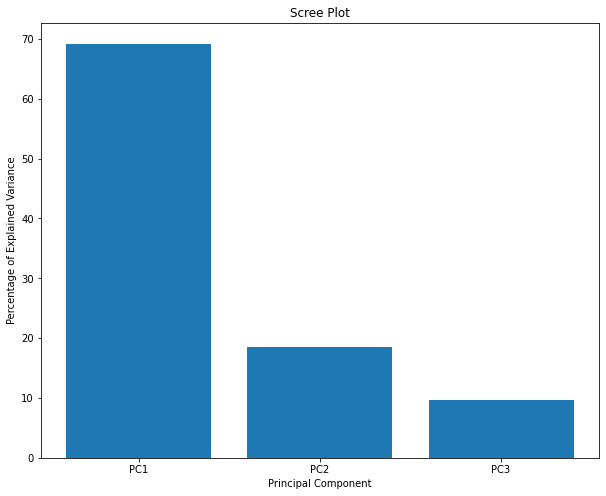

In [ ]:
# Plot the variace ratios as a bar graph

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

## Question 4. As a good data visualizer expert, how many principal components should be used to transform this data without loosing much information? Explain your calculations.
$\color{red}{\text{Answer:}}$

We should at least have 3 principal components beacuse their sum passes the 95% test we need to pass to have enough variance so it does not look like we lost a lot of data.

In [ ]:
# Create a new dataframe using the new data set
pca_df = pd.DataFrame(pca_data, columns=['PC1','PC2', 'PC3'])
print(pca_df)

            PC1       PC2       PC3
0     -3.099619  2.313546  0.408997
1     -2.741416  5.038883  0.314292
2     -2.666814  0.003517  0.659652
3     -2.465572 -0.479340  1.087407
4     -3.071414 -0.487888  0.537034
...         ...       ...       ...
52139 -0.226619  0.370775 -0.580335
52140 -0.275051 -1.447134 -0.124568
52141 -0.146007  0.243755  1.374351
52142  0.415010  0.533507 -0.175187
52143 -0.120248 -0.985872 -0.565517

[52144 rows x 3 columns]


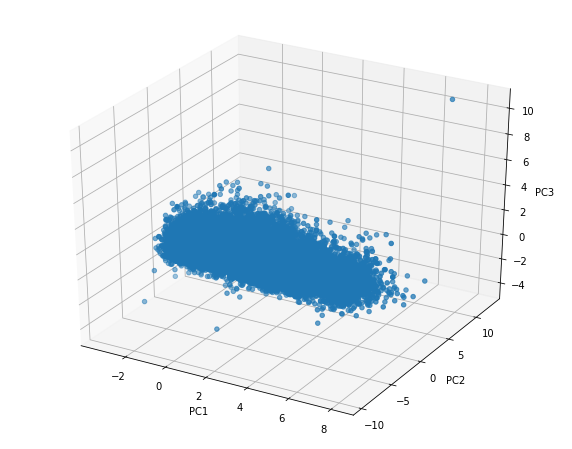

In [ ]:
figure = plt.figure()
fig = figure.add_subplot( projection='3d')


x = np.array(pca_df['PC1'])
y = np.array(pca_df['PC2'])
z = np.array(pca_df['PC3'])


fig.scatter(x,y,z)

fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')

plt.show()

In [ ]:
print(pca.components_)

[[ 0.45048568 -0.00209725  0.09780581  0.42356814  0.45090377  0.45082895
   0.44891129]
 [-0.03454976 -0.72944548  0.67668023 -0.03538847  0.00273288  0.00140702
  -0.08693493]
 [-0.00621292  0.67479844  0.72694411 -0.10284451 -0.0409455  -0.04918881
   0.03857014]]


In [ ]:
# Show the most important PC and show the column which has the highest affect on the variance
print(np.argmax(pca.components_[0]))

4


## Question 5. Which feature/features have the highest effect on the variance or in other words, which feature is responsible from the differences between diamonds the most? Explain it.
$\color{red}{\text{Answer:}}$

5th column (index 4) which is variable x - length in mm has the highest effect on the variance, but it is very close with column 1, 6 and 7 which are carat, y - width in mm, and z - depth in mm respectively.

## GRADUATE STUDENTS WORK. Find and show the realtions between the color and the price. Explain your approach and discuss your calculations and the graphs below.
$\color{red}{\text{Answer:}}$

First, I cleaned the data and got rid of outliers and diamonds whose depth did not match the depth formula. Then, I dropped unnecesary columns and only left the two column we are working on - color and price. I created a boxplot to see the general price distribution across all colors. Based on the boxplot graph, D and E represent the lowest group of prices among the rest of the colors, this include median prices and first quartiles. F anf G represent the second group with medium prices compared to the rest of the colors. And lastly, the third group with overall higher prices encompases H, I, and J.   

In [ ]:
outliers = df[(df['x'] < 3.5) | (df['y'] < 3.5) | (df['z'] < 2.0) | (df['y'] > 10) | (df['z'] > 6)]
print(outliers.shape)
outliers.head()

(38, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [ ]:
no_outliers_df = df.drop(outliers.index, axis = 0)
print(no_outliers_df.shape)
no_outliers_df.head()

(53902, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
incorrect_depth = no_outliers_df[abs((no_outliers_df['depth'] - abs(2 * no_outliers_df['z'] / ( no_outliers_df['x'] + no_outliers_df['y'] ) ) * 100)) > 0.1]
print(incorrect_depth.shape)
incorrect_depth.head()

(1758, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
151,0.74,Ideal,I,SI1,61.3,56.0,2769,5.82,5.86,3.57
177,0.72,Very Good,G,VS2,63.7,56.4,2776,5.62,5.69,3.61


In [ ]:
final_df = df.drop(incorrect_depth.index, axis = 0)
print(final_df.shape)
final_df.head()

(52182, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
color_price = final_df.drop(columns = ['x', 'y', 'z', 'carat','cut', 'clarity','depth', 'table'])
print(color_price.shape)
color_price.head(15)

(52182, 2)


,color,price
1,E,326
2,E,327
3,I,334
4,J,335
5,J,336
6,I,336
7,H,337
8,E,337
9,H,338
10,J,339


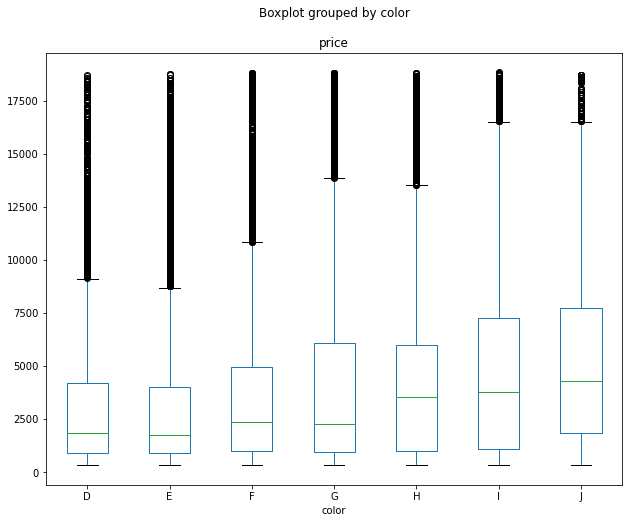

In [ ]:
# print(color_price_corr)
ax = color_price.boxplot(by ='color', column =['price'], grid = False)

In [ ]:
mapping = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}

for k,v in mapping.items():
    v = str(v)
    color_price["color"] = color_price["color"].str.replace(k,v)



In [ ]:
color_price.head(10)

,color,price
1,2,326
2,2,327
3,6,334
4,7,335
5,7,336
6,6,336
7,5,337
8,2,337
9,5,338
10,7,339
